## Notebook 4: Clustering

This notebook performs K-Means clustering on the preprocessed data.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from kmodes.kmodes import KModes
from sklearn.metrics import silhouette_score
from kneed import KneeLocator # For automatically finding the elbow point

# Setup
np.random.seed(42)
output_dir = "outputs"
os.makedirs(output_dir, exist_ok=True)

# Seaborn style
try:
    sns.set_theme(style="whitegrid")
except AttributeError:
    try:
        sns.set()
    except Exception:
        plt.style.use('ggplot')

print("Setup complete.")

Setup complete.


In [2]:
# Load cleaned data (ensure you've already saved cleaned_data.ftr)
df_final = pd.read_feather("outputs/preprocessed_data_final.ftr")

In [3]:
# Optionally keep Customer_ID for mapping
customer_ids = df_final['Customer_ID']

# Drop Customer_ID before clustering
X = df_final.drop(columns=['Customer_ID'])

In [4]:
X.head()

,Seasonality_Segment,EA_Segment,Revenue_Bucket,Profit_Bucket,Market_Share_Segment,Churn_Segment,Competitiveness_Flag,Volume_Segment,Density_Segment,Propensity,Casino_Potential_Class
0,1,2,0.0,0.0,0.0,3,1,3.0,3.0,0.0,0.0
1,1,2,0.0,0.0,0.0,3,0,2.0,2.0,0.0,0.0
2,1,2,0.0,0.0,0.0,3,0,2.0,2.0,0.0,0.0
3,1,2,0.0,0.0,0.0,3,1,3.0,3.0,0.0,0.0
4,1,2,0.0,0.0,0.0,3,1,3.0,3.0,0.0,0.0


In [5]:
# Check shape
print("Final data shape for clustering:", X.shape)

Final data shape for clustering: (3030, 11)


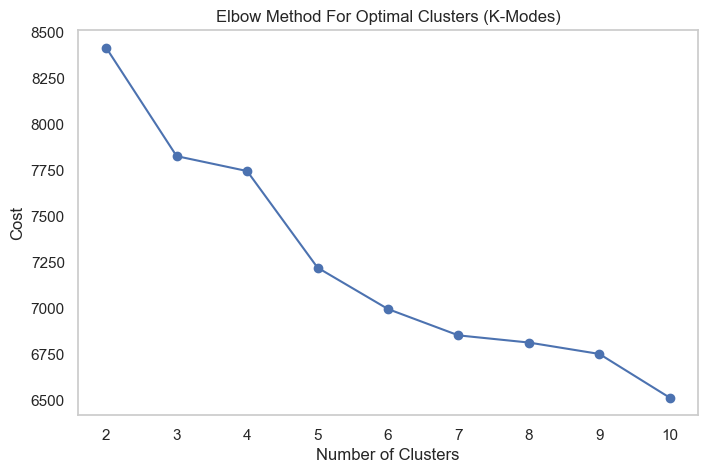

In [6]:
# Find optimal number of clusters using cost (elbow method)
costs = []
K = range(2, 11)

for k in K:
    km = KModes(n_clusters=k, init="Cao", n_init=5, verbose=0)
    km.fit_predict(X)
    costs.append(km.cost_)

# Plot Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K, costs, 'bo-')
plt.xlabel('Number of Clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal Clusters (K-Modes)')
plt.grid()
plt.show()

In [15]:
from sklearn.metrics import calinski_harabasz_score

score = calinski_harabasz_score(X, df_final['Cluster'] )
print("Calinski-Harabasz Score:", score)


Calinski-Harabasz Score: 881.7400389770789


In [16]:
from sklearn.metrics import davies_bouldin_score

score = davies_bouldin_score(X, df_final['Cluster'])
print("Davies-Bouldin Score:", score)


Davies-Bouldin Score: 1.7589351694840594


### Experimenting with k = [4,5,6,7]

In [7]:
# Import required libraries
from kmodes.kmodes import KModes
from sklearn.manifold import TSNE
import umap.umap_ as umap
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Define list of k values to experiment with
k_values = [4, 5, 6, 7]  # Add or modify k values here

# Separate Customer_ID and features
customer_ids = df_final['Customer_ID']
X = df_final.drop(columns=['Customer_ID', 'Cluster'], errors='ignore')  # Drop non-feature columns

# Loop over each k value
for k in k_values:
    print(f"\nRunning K-modes clustering with k={k}...")
    
    # Step 1: Perform K-modes clustering
    km = KModes(n_clusters=k, init="Cao", n_init=10, verbose=1)
    cluster_labels = km.fit_predict(X)
    
    # Step 2: Append cluster labels to data
    df_temp = df_final.copy()
    df_temp['Cluster'] = cluster_labels
    
    # Step 3: Save clustering results
    output_dir = "outputs"
    os.makedirs(output_dir, exist_ok=True)
    filename = f"outputs/clustering_results_k{k}.csv"
    df_temp.to_csv(filename, index=False)
    print(f"Clustering results saved to {filename}")
    
    # Step 4: Display cluster distribution
    print(f"\nCluster distribution for k={k}:")
    print(df_temp['Cluster'].value_counts())
    
    # Step 5: t-SNE visualization
    tsne = TSNE(n_components=2, perplexity=30, random_state=42)
    X_embedded = tsne.fit_transform(X)
    tsne_df = pd.DataFrame({
        'TSNE1': X_embedded[:, 0],
        'TSNE2': X_embedded[:, 1],
        'Cluster': cluster_labels
    })
    plt.figure(figsize=(10, 7))
    sns.scatterplot(data=tsne_df, x='TSNE1', y='TSNE2', hue='Cluster', palette='viridis', s=100)
    plt.title(f'Customer Clusters Visualized via t-SNE (k={k})')
    plt.xlabel('TSNE Component 1')
    plt.ylabel('TSNE Component 2')
    plt.legend(title='Cluster')
    plt.grid(True)
    plt.tight_layout()
    tsne_filename = f"outputs/{k}_clusters_visualization_tsne.png"
    plt.savefig(tsne_filename)
    plt.close()
    print(f"t-SNE visualization saved to {tsne_filename}")
    
    # Step 6: UMAP visualization
    reducer = umap.UMAP(random_state=42)
    X_umap = reducer.fit_transform(X)
    umap_df = pd.DataFrame({
        'UMAP1': X_umap[:, 0],
        'UMAP2': X_umap[:, 1],
        'Cluster': cluster_labels
    })
    plt.figure(figsize=(10, 7))
    sns.scatterplot(data=umap_df, x='UMAP1', y='UMAP2', hue='Cluster', palette='viridis', s=100)
    plt.title(f'Customer Clusters via UMAP (k={k})')
    plt.xlabel('UMAP Component 1')
    plt.ylabel('UMAP Component 2')
    plt.legend(title='Cluster')
    plt.grid(True)
    plt.tight_layout()
    umap_filename = f"outputs/{k}_clusters_visualization_umap.png"
    plt.savefig(umap_filename)
    plt.close()
    print(f"UMAP visualization saved to {umap_filename}")

c:\Users\Achintye Kamra\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm



Running K-modes clustering with k=4...
Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 275, cost: 7745.0
Run 1, iteration: 2/100, moves: 8, cost: 7745.0
Clustering results saved to outputs/clustering_results_k4.csv

Cluster distribution for k=4:
Cluster
0    1947
1     737
2     308
3      38
Name: count, dtype: int64
t-SNE visualization saved to outputs/4_clusters_visualization_tsne.png


c:\Users\Achintye Kamra\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


UMAP visualization saved to outputs/4_clusters_visualization_umap.png

Running K-modes clustering with k=5...
Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 342, cost: 7289.0
Run 1, iteration: 2/100, moves: 119, cost: 7220.0
Run 1, iteration: 3/100, moves: 1, cost: 7220.0
Clustering results saved to outputs/clustering_results_k5.csv

Cluster distribution for k=5:
Cluster
0    1944
1     540
2     274
4     233
3      39
Name: count, dtype: int64
t-SNE visualization saved to outputs/5_clusters_visualization_tsne.png


c:\Users\Achintye Kamra\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


UMAP visualization saved to outputs/5_clusters_visualization_umap.png

Running K-modes clustering with k=6...
Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 427, cost: 6995.0
Run 1, iteration: 2/100, moves: 67, cost: 6995.0
Clustering results saved to outputs/clustering_results_k6.csv

Cluster distribution for k=6:
Cluster
0    1934
1     448
2     249
5     182
4     180
3      37
Name: count, dtype: int64
t-SNE visualization saved to outputs/6_clusters_visualization_tsne.png


c:\Users\Achintye Kamra\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


UMAP visualization saved to outputs/6_clusters_visualization_umap.png

Running K-modes clustering with k=7...
Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 464, cost: 6852.0
Run 1, iteration: 2/100, moves: 107, cost: 6852.0
Clustering results saved to outputs/clustering_results_k7.csv

Cluster distribution for k=7:
Cluster
0    1866
1     432
2     247
5     182
4     180
6      89
3      34
Name: count, dtype: int64
t-SNE visualization saved to outputs/7_clusters_visualization_tsne.png


c:\Users\Achintye Kamra\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


UMAP visualization saved to outputs/7_clusters_visualization_umap.png


In [8]:
from kmodes.kmodes import KModes
import numpy as np
from sklearn.metrics import silhouette_score
import pandas as pd

# Load data
X = df_final.drop(columns=['Customer_ID', 'Cluster'], errors='ignore')

# Define k values
k_values = [4, 5, 6, 7]

# Dictionary to store metrics
metrics = {'k': [], 'Cost': [], 'Silhouette': []}

# Custom Hamming distance for silhouette score
def hamming_distance(x, y):
    return np.sum(x != y) / len(x)

# Loop over k values
for k in k_values:
    print(f"Evaluating k={k}...")
    
    # Run K-modes
    km = KModes(n_clusters=k, init="Cao", n_init=10, verbose=0)
    cluster_labels = km.fit_predict(X)
    
    # Cost
    cost = km.cost_
    metrics['k'].append(k)
    metrics['Cost'].append(cost)
    
    # Silhouette score
    X_array = X.to_numpy()
    silhouette_avg = silhouette_score(X_array, cluster_labels, metric=hamming_distance)
    metrics['Silhouette'].append(silhouette_avg)
    
    print(f"k={k}: Cost={cost:.2f}, Silhouette={silhouette_avg:.3f}")

# Create DataFrame for metrics
metrics_df = pd.DataFrame(metrics)
print("\nClustering Metrics:")
print(metrics_df)

Evaluating k=4...
k=4: Cost=7745.00, Silhouette=0.410
Evaluating k=5...
k=5: Cost=7220.00, Silhouette=0.401
Evaluating k=6...
k=6: Cost=6995.00, Silhouette=0.399
Evaluating k=7...
k=7: Cost=6852.00, Silhouette=0.392

Clustering Metrics:
   k    Cost  Silhouette
0  4  7745.0    0.410372
1  5  7220.0    0.400555
2  6  6995.0    0.399441
3  7  6852.0    0.392196


### Final K = 4 as Silhouette score is 'Highest' and visualisation is also 'Better'

In [9]:
# Final clustering with 4 clusters
final_k = 4
km = KModes(n_clusters=final_k, init="Cao", n_init=10, verbose=1)
cluster_labels = km.fit_predict(X)

# Append cluster labels to data
df_final['Cluster'] = cluster_labels

# Save results
df_final.to_csv("outputs/clustering_results_k4.csv", index=False)
df_final.head()


Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 275, cost: 7745.0
Run 1, iteration: 2/100, moves: 8, cost: 7745.0


,Customer_ID,Seasonality_Segment,EA_Segment,Revenue_Bucket,Profit_Bucket,Market_Share_Segment,Churn_Segment,Competitiveness_Flag,Volume_Segment,Density_Segment,Propensity,Casino_Potential_Class,Cluster
0,Accoount 1,1,2,0.0,0.0,0.0,3,1,3.0,3.0,0.0,0.0,0
1,Accoount 2,1,2,0.0,0.0,0.0,3,0,2.0,2.0,0.0,0.0,0
2,Accoount 3,1,2,0.0,0.0,0.0,3,0,2.0,2.0,0.0,0.0,0
3,Accoount 4,1,2,0.0,0.0,0.0,3,1,3.0,3.0,0.0,0.0,0
4,Accoount 5,1,2,0.0,0.0,0.0,3,1,3.0,3.0,0.0,0.0,0


In [10]:
df_final['Cluster'].value_counts()


Cluster
0    1947
1     737
2     308
3      38
Name: count, dtype: int64

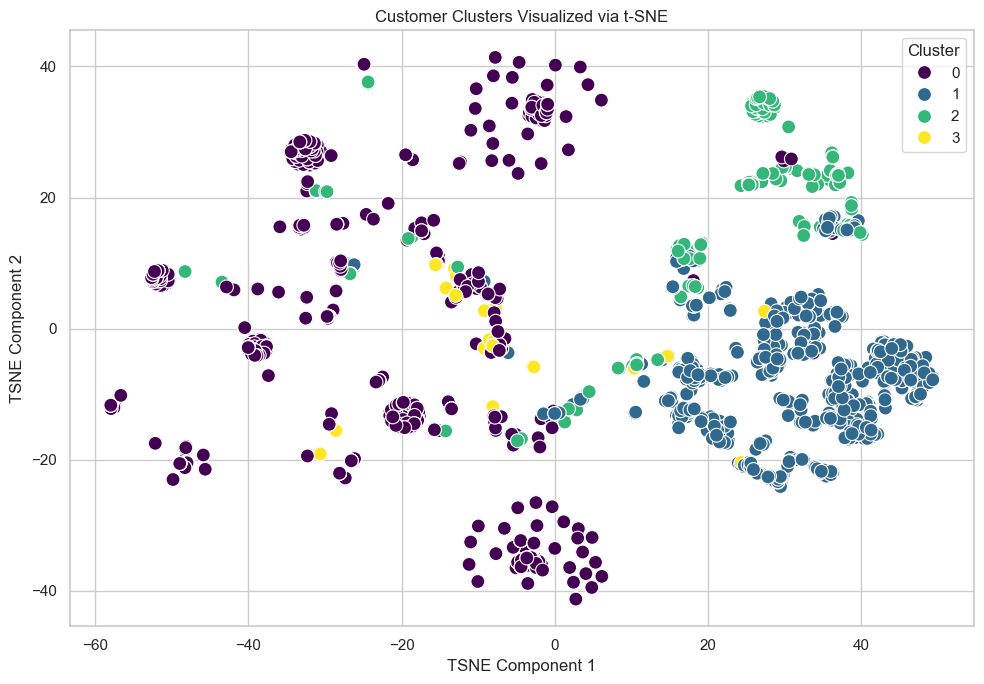

In [ ]:
from sklearn.manifold import TSNE
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Separate Customer_ID and Cluster
customer_ids = df_final['Customer_ID']
clusters = df_final['Cluster']

# Drop non-feature columns
X = df_final.drop(columns=['Customer_ID', 'Cluster'])

# t-SNE dimensionality reduction to 2D
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_embedded = tsne.fit_transform(X)

# Create DataFrame for plotting
tsne_df = pd.DataFrame({
    'TSNE1': X_embedded[:,0],
    'TSNE2': X_embedded[:,1],
    'Cluster': clusters
})

# Plot
plt.figure(figsize=(10, 7))
sns.scatterplot(data=tsne_df, x='TSNE1', y='TSNE2', hue='Cluster', palette='viridis', s=100)
plt.title('Customer Clusters Visualized via t-SNE')
plt.xlabel('TSNE Component 1')
plt.ylabel('TSNE Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.tight_layout()
plt.savefig("outputs/4_clusters_visualization_tsne.png")
plt.show()

### UMAP

c:\Users\Achintye Kamra\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


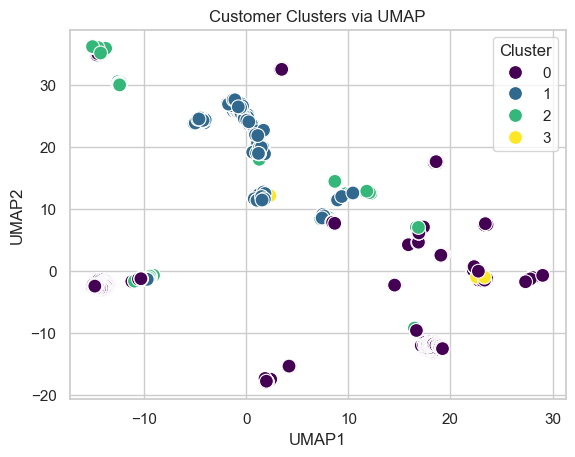

In [13]:
import umap.umap_ as umap
reducer = umap.UMAP(random_state=42)

X_umap = reducer.fit_transform(X)

umap_df = pd.DataFrame({'UMAP1': X_umap[:,0], 'UMAP2': X_umap[:,1], 'Cluster': clusters})

sns.scatterplot(data=umap_df, x='UMAP1', y='UMAP2', hue='Cluster', palette='viridis', s=100)
plt.title('Customer Clusters via UMAP')
plt.show()